In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
F:\Anaconda2019_07\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


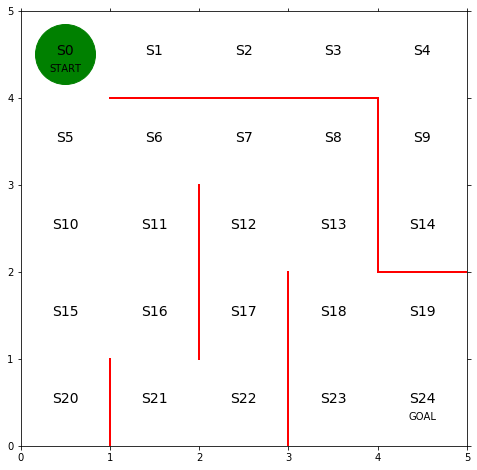

In [3]:
#迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([2, 2], [1, 3], color='red', linewidth=2)
plt.plot([3, 3], [0, 2], color='red', linewidth=2)
plt.plot([1, 4], [4, 4], color='red', linewidth=2)
plt.plot([4, 4], [2, 4], color='red', linewidth=2)
plt.plot([4, 5], [2, 2], color='red', linewidth=2)

#画出表示状态的文字S0-S24
#第一行
plt.text(0.5, 4.5, 'S0', size=14, ha='center')
plt.text(1.5, 4.5, 'S1', size=14, ha='center')
plt.text(2.5, 4.5, 'S2', size=14, ha='center')
plt.text(3.5, 4.5, 'S3', size=14, ha='center')
plt.text(4.5, 4.5, 'S4', size=14, ha='center')

#第二行
plt.text(0.5, 3.5, 'S5', size=14, ha='center')
plt.text(1.5, 3.5, 'S6', size=14, ha='center')
plt.text(2.5, 3.5, 'S7', size=14, ha='center')
plt.text(3.5, 3.5, 'S8', size=14, ha='center')
plt.text(4.5, 3.5, 'S9', size=14, ha='center')

#第三行
plt.text(0.5, 2.5, 'S10', size=14, ha='center')
plt.text(1.5, 2.5, 'S11', size=14, ha='center')
plt.text(2.5, 2.5, 'S12', size=14, ha='center')
plt.text(3.5, 2.5, 'S13', size=14, ha='center')
plt.text(4.5, 2.5, 'S14', size=14, ha='center')

#第四行
plt.text(0.5, 1.5, 'S15', size=14, ha='center')
plt.text(1.5, 1.5, 'S16', size=14, ha='center')
plt.text(2.5, 1.5, 'S17', size=14, ha='center')
plt.text(3.5, 1.5, 'S18', size=14, ha='center')
plt.text(4.5, 1.5, 'S19', size=14, ha='center')

#第五行
plt.text(0.5, 0.5, 'S20', size=14, ha='center')
plt.text(1.5, 0.5, 'S21', size=14, ha='center')
plt.text(2.5, 0.5, 'S22', size=14, ha='center')
plt.text(3.5, 0.5, 'S23', size=14, ha='center')
plt.text(4.5, 0.5, 'S24', size=14, ha='center')
plt.text(0.5, 4.3, 'START', ha='center')
plt.text(4.5, 0.3, 'GOAL', ha='center')

#设定画图的范围
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5], [4.5], marker="o", color='g', markersize=60)

In [4]:
#设定参数θ的初始值theta_0，用于确定初始方案

#行为状态0-24，列为↑，→，↓，←表示的移动方向
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, 1, np.nan, 1],  # s2
                    [np.nan, 1, np.nan, 1],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, 1, 1, np.nan],  # s5
                    [np.nan, 1,1,1],  # s6
                    [np.nan, 1,1,1],  # s7
                    [np.nan, np.nan, 1, 1],  # s8
                    [1, 1, 1, np.nan],  # s9
                    [1, 1, 1, np.nan],  # s10
                    [1, np.nan, 1, 1],  # s11
                    [1, 1,1, np.nan],  # s12
                    [1, np.nan, 1,1],  # s13
                    [1, 1,np.nan, np.nan],  # s14
                    [1, 1, 1, np.nan],  # s15
                    [1, np.nan, 1, 1],  # s16
                    [1, np.nan, 1, np.nan],  # s17
                    [1, 1, 1, np.nan],  # s18
                    [np.nan, 1,1,1],  # s19
                    [1, np.nan, np.nan, np.nan],  # s20
                    [1, 1, np.nan, np.nan],  # s21
                    [1, np.nan, np.nan, 1],  # s22
                    [1, 1, np.nan, np.nan],  # s23、※s24是目标，无策略
                    ])

In [5]:
#策略参数theta根据softmax函数转换为行动策略π的定义


def softmax_convert_into_pi_from_theta(theta):
    '''根据softmax函数计算比率'''

    beta = 1.0
    [m, n] = theta.shape  # 求得theta矩阵的大小
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # 将theta转换为exp(theta)

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 简单地计算比率

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # 用softmax计算比率

    pi = np.nan_to_num(pi)  # 将nan转换为0

    return pi

In [6]:
# 求得初始策略pi_0
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [1.         0.         0.         0.        ]
 [0.5        

In [7]:
# 定义求取动作a以及1步移动后的状态s的函数


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # 根据pi[s,:]的概率来选择direction
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 5  # 向上移动时，状态数减5
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 向右移动时状态的数字增加1
    elif next_direction == "down":
        action = 2
        s_next = s + 5  # 向下移动时状态的数字增加5
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 向左移动时状态的数字减少1

    return [action, s_next]

In [8]:
# 定义求解迷宫问题的函数，它输出状态和动作


def goal_maze_ret_s_a(pi):
    s = 0  #开始地点
    s_a_history = [[0, np.nan]]  # 记录智能体移动轨迹的列表

    while (1):  # 直至到达目标的路径
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 代入当前状态（即目前最后一个状态index=-1）的动作

        s_a_history.append([next_s, np.nan])
        # 代入下一个状态，由于还不知道其动作，用nan表示

        if next_s == 24:  # 到达目标地点终止
            break
        else:
            s = next_s

    return s_a_history

In [9]:
# 用初始策略求解迷宫问题
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("求解迷宫问题所需步数" + str(len(s_a_history) - 1) )

[[0, 2], [5, 2], [10, 1], [11, 0], [6, 1], [7, 1], [8, 2], [13, 2], [18, 2], [23, 0], [18, 2], [23, 0], [18, 1], [19, 3], [18, 0], [13, 0], [8, 2], [13, 0], [8, 3], [7, 3], [6, 3], [5, 2], [10, 2], [15, 1], [16, 2], [21, 1], [22, 3], [21, 1], [22, 3], [21, 1], [22, 3], [21, 0], [16, 2], [21, 1], [22, 3], [21, 0], [16, 3], [15, 0], [10, 0], [5, 1], [6, 1], [7, 1], [8, 3], [7, 1], [8, 3], [7, 1], [8, 2], [13, 2], [18, 1], [19, 1], [20, 0], [15, 1], [16, 2], [21, 1], [22, 0], [17, 0], [12, 2], [17, 0], [12, 2], [17, 0], [12, 2], [17, 0], [12, 1], [13, 0], [8, 3], [7, 3], [6, 2], [11, 2], [16, 3], [15, 1], [16, 0], [11, 2], [16, 2], [21, 1], [22, 3], [21, 0], [16, 0], [11, 2], [16, 2], [21, 0], [16, 3], [15, 2], [20, 0], [15, 1], [16, 0], [11, 2], [16, 3], [15, 0], [10, 0], [5, 1], [6, 1], [7, 1], [8, 2], [13, 0], [8, 3], [7, 1], [8, 2], [13, 0], [8, 3], [7, 3], [6, 3], [5, 1], [6, 2], [11, 2], [16, 0], [11, 2], [16, 2], [21, 1], [22, 3], [21, 0], [16, 0], [11, 3], [10, 1], [11, 2], [16, 2

In [10]:
# 定义theta的更新函数


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # 到达目标的总步数

    [m, n] = theta.shape  # ttheta矩阵的大小
    delta_theta = theta.copy()  # 生成初始的delta_theta，由于指针原因不能直接使用delta_theta=theta

    # 求取delta_theta的各元素
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta不是nan时

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 从列表中取出状态i

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 取出状态i下应该采取的动作j

                N_i = len(SA_i)  # 状态i下动作的总次数
                N_ij = len(SA_ij)  # 状态i下采取动作j的次数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [11]:
# 策略更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49982639 0.50017361 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33294763 0.33364199 0.33341038 0.        ]
 [0.         0.33364205 0.33317898 0.33317898]
 [0.         0.33395085 0.33279331 0.33325584]
 [0.         0.         0.49982639 0.50017361]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.33294731 0.         0.33410538 0.33294731]
 [0.33287048 0.33333312 0.3337964  0.        ]
 [0.33387355 0.         0.33341016 0.33271628]
 [0.5        0.5        0.         0.        ]
 [0.33287048 0.3337964  0.33333312 0.        ]
 [0.33341038 0.         0.33364199 0.33294763]
 [0.50086805 0.         0.49913195 0.        ]
 [0.33310188 0.33333328 0.33356484 0.        ]
 [0.         0.33341048 0.33317903 0.33341048]
 [1.         0.         0.         0.        ]
 [0.49965278 

In [12]:
# 策略梯度法求解迷宫问题

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 策略的变化＜10^-4，则结束学习


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # 重复，直到is_continue为False
    s_a_history = goal_maze_ret_s_a(pi)  # 由策略π搜索迷宫探索历史
    new_theta = update_theta(theta, pi, s_a_history)  # 更新参数Θ
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 更新参数π

    print(np.sum(np.abs(new_pi - pi)))  # 输出策略的变化
    print("求解迷宫问题所需要的步数" + str(len(s_a_history) - 1) )

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.01586076785783025
求解迷宫问题所需要的步数124
0.011172194987477568
求解迷宫问题所需要的步数204
0.02838987553642508
求解迷宫问题所需要的步数28
0.014672931462557603
求解迷宫问题所需要的步数80
0.01801595476689044
求解迷宫问题所需要的步数70
0.015771863276160092
求解迷宫问题所需要的步数122
0.015626702602129894
求解迷宫问题所需要的步数100
0.018455490208129255
求解迷宫问题所需要的步数84
0.010844620665018678
求解迷宫问题所需要的步数180
0.0076868072384964625
求解迷宫问题所需要的步数320
0.02272768936489078
求解迷宫问题所需要的步数22
0.016152006289149257
求解迷宫问题所需要的步数130
0.009063052051754172
求解迷宫问题所需要的步数350
0.02487032382529203
求解迷宫问题所需要的步数56
0.014316908015461649
求解迷宫问题所需要的步数136
0.007096453137466874
求解迷宫问题所需要的步数570
0.010805192646634987
求解迷宫问题所需要的步数168
0.012698371317759582
求解迷宫问题所需要的步数234
0.024779761991846616
求解迷宫问题所需要的步数26
0.008229424106548144
求解迷宫问题所需要的步数278
0.007592568700196867
求解迷宫问题所需要的步数352
0.010997621789538836
求解迷宫问题所需要的步数208
0.016274596190968993
求解迷宫问题所需要的步数92
0.0116864085596734
求解迷宫问题所需要的步数120
0.009052103029395298
求解迷宫问题所需要的步数198
0.017353231926235724
求解迷宫问题所需要的步数46
0.022167773432250515
求解迷宫问题所需要的步数42
0.012985854689622

In [13]:
# 确认最终的策略
np.set_printoptions(precision=3, suppress=True)  # 设置有效位数为3，不显示指数
print(pi)

[[0.    0.007 0.993 0.   ]
 [0.    0.21  0.    0.79 ]
 [0.    0.436 0.    0.564]
 [0.    0.485 0.    0.515]
 [0.    0.    0.524 0.476]
 [0.006 0.989 0.005 0.   ]
 [0.    0.991 0.004 0.005]
 [0.    0.036 0.959 0.005]
 [0.    0.    0.941 0.059]
 [0.342 0.331 0.327 0.   ]
 [0.471 0.351 0.178 0.   ]
 [0.591 0.    0.18  0.229]
 [0.006 0.99  0.004 0.   ]
 [0.004 0.    0.993 0.004]
 [0.489 0.511 0.    0.   ]
 [0.406 0.311 0.283 0.   ]
 [0.431 0.    0.337 0.232]
 [0.733 0.    0.267 0.   ]
 [0.007 0.009 0.984 0.   ]
 [0.    0.066 0.785 0.149]
 [1.    0.    0.    0.   ]
 [0.39  0.61  0.    0.   ]
 [0.653 0.    0.    0.347]
 [0.008 0.992 0.    0.   ]]


In [14]:
# 可视化智能体的移动
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 初始化背景图像
    line.set_data([], [])
    return (line,)


def animate(i):
    # 每一帧画面内容
    state = s_a_history[i][0]  # 画出现在的场景
    x = (state % 5) + 0.5  # 状态的x坐标为状态除以5的余数加上0。5
    y = 4.5 - int(state / 5)  # 状态的y坐标为4.5减去（状态数除以5）
    line.set_data(x, y)
    return (line,)


#　使用初始化函数和每帧中的绘图函数来生成动画
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())